# Baseline: 


# 数据探索--EDA
- 读数据
- 看分布
- 查关联
- 找异常
- 填空值
- 转非数  
简单解释: 看分布-》查看label分布；查关联-》绘制热力图，观察各个特征与label的关联度白色代表紧密； 
找异常-》绘制散点图箱型图观察异常，可以抢救的不删除。

参考公众号文章[数据预处理](https://mp.weixin.qq.com/s?__biz=MzIyNjM2MzQyNg==&mid=2247485515&idx=1&sn=5605ed081658c6bb57474d759d77c64c&chksm=e870d906df0750100da9decae168475c5bb3ab0007cea1337049d575204bafb0ea2f84f35bf6&mpshare=1&scene=1&srcid=&sharer_sharetime=1566892119338&sharer_shareid=f5085fbf4d1658b5e95ecd70a122e9ea&key=5870bcb69e771e090e74f8d48432b65906129afa27ff4851c27b34e8b3f9c7daf612f0b0f3146121f390a34dc0ddfb1afcb41d6ac928624b7bfba5c487eb0dd545da326ac5ffacc5b86556fe30d2b69f&ascene=1&uin=MTM0NTI4NTI0MQ%3D%3D&devicetype=Windows+7&version=62060833&lang=zh_CN&pass_ticket=6sTY0xJF7a7pVen43cDpvAhj8aihfWR6JGw%2FcB0phOkfVQN9QJGUH92XeQULsw7E)

## 流程
- 整体观察
- 无关特征删除
- 类型转换
- 处理缺失值(分为离散值和连续值)
- 离群值处理
- 归一化  
此外，边观察边规划

导入文件，借助通用的.head() .describe() overall()整体观察

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #用到了里面的hist
import seaborn as sns     #和标签列做相关性分析

In [2]:
data_orig = pd.read_csv("./data.csv",encoding = 'gbk'
                       #,index_col = 0
                       )   #读取文件
data_orig.head()

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


一共90个特征。所以，仅仅依靠业务理解无法处理全部特征。大部分需要进行统计学分析。第一列'Unnamed'业务上理解似乎可以删除，**任务规划**：需要和标签列做相关性分析再考量。

迫不及待观察一下标签列

In [3]:
data_orig['status'].value_counts()

0    3561
1    1193
Name: status, dtype: int64

In [4]:
3561/1193

2.9849119865884326

两类；0表示未逾期，3561个。1表示逾期1193个。类别不平衡大概3:1的比例。  
**任务规划**后续可以尝试分类阈值移动法则[参考"机器学习中的类别不平衡问题"](https://www.cnblogs.com/wkslearner/p/8870673.html)。
[参考lr中类别不均衡时参数设置的方法](https://blog.csdn.net/Candy_GL/article/details/82858471)另有机器学习P66 

样本均衡时，几率为1。此时，分类阈值为0.5。样本比例1:3,预测小样本的阈值应该设定为1/(1+3) = 0.25

继续，观察其他特征的数据类型等信息。

In [5]:
data_orig.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


数值型特征有83个，其它信息暂时略过

In [6]:
def overall(data):   #观察并打印特征的数据类型分布
    typedic= {} # 类型字典
    for name in data.columns:
        typedic[str(data[name].dtype)] = typedic.get(str(data[name].dtype),[])+[name]
    for key,value in typedic.items():
        print('we have {} columns in type {}, they are {}\n'.format(len(value),key,value))

In [7]:
overall(data_orig)

we have 13 columns in type int64, they are ['Unnamed: 0', 'custid', 'take_amount_in_later_12_month_highest', 'repayment_capability', 'is_high_user', 'historical_trans_amount', 'trans_amount_3_month', 'abs', 'avg_price_last_12_month', 'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'status']

we have 7 columns in type object, they are ['trade_no', 'bank_card_no', 'reg_preference_for_trad', 'source', 'id_name', 'latest_query_time', 'loans_latest_time']

we have 70 columns in type float64, they are ['low_volume_percent', 'middle_volume_percent', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_day', 'rank_trad_1_month', 'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month', 'avg_price

object是最基本的类型。 type(int) == type。type是object的子类。[参考对象层次结构](https://www.cnblogs.com/yl153/p/6189455.html)

有7列是object非数值类型，列名为['trade_no', 'bank_card_no', 'reg_preference_for_trad(所在城市等级)', 'source'(未知，但值都一样为xs), 'id_name', 'latest_query_time', 'loans_latest_time'(上次贷款时间)]

**任务规划**：有时间序列需要处理，有_no. _id等无关特征需要删除

## 无关特征删除 

特征删除原则：和标签列无关
- 所有用户在该特征上取值相同
- 部分无意义特征：如用户姓名等

In [8]:
data = data_orig.copy()    #df是immutable

In [9]:
def same_value_delete(data):
    for name in data.columns:
        if len(data[name].value_counts())==1:
            data.drop(name,axis = 1,inplace = True)
    return data

In [10]:
data = same_value_delete(data)

In [11]:
data.shape

(4754, 88)

In [12]:
overall(data)

we have 13 columns in type int64, they are ['Unnamed: 0', 'custid', 'take_amount_in_later_12_month_highest', 'repayment_capability', 'is_high_user', 'historical_trans_amount', 'trans_amount_3_month', 'abs', 'avg_price_last_12_month', 'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 'pawns_auctions_trusts_consume_last_6_month', 'status']

we have 5 columns in type object, they are ['trade_no', 'reg_preference_for_trad', 'id_name', 'latest_query_time', 'loans_latest_time']

we have 70 columns in type float64, they are ['low_volume_percent', 'middle_volume_percent', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_day', 'rank_trad_1_month', 'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month',

删掉了两个特征：'source' 'bank_card_no'（这个特别意外）观察一下

In [13]:
data_orig['bank_card_no'].value_counts()

卡号1    4754
Name: bank_card_no, dtype: int64

In [14]:
data_orig['bank_card_no'].dtype==object

True

确实该特征全部样本都一样

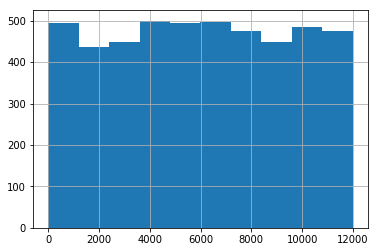

In [15]:
data.iloc[:,0].hist()

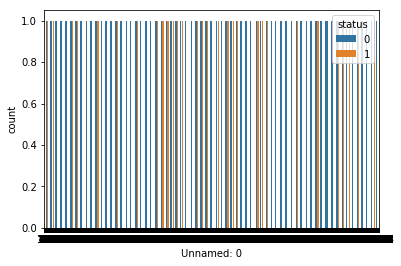

In [16]:
sns.countplot(data = data, x = 'Unnamed: 0', hue = 'status')

In [17]:
len(set(data_orig.iloc[:,0]))

4754

因为业务上无意义，每个样本的取值不一样，和标签列几乎无相关性，可以看成是一个类似于客户id的特征，删掉。

In [18]:
del(data['Unnamed: 0'])

In [19]:
len(data['custid'].value_counts())

4754

In [20]:
len(data['trade_no'].value_counts())

4754

In [21]:
len(data['id_name'].value_counts())

4309

以上三个特征，根据业务理解已知均为无关特征，故删除

In [22]:
data.drop(columns=['custid','trade_no','id_name'],inplace=True)

In [23]:
data.shape

(4754, 84)

## 类型转换
- 分类数据的编码 有距变量(体重) or 有序变量(学历) or 名义变量(国家)
- label encoding  V.S. one-hot encoding(相当于特征衍生) 
- 时间序列 衍生还是--》float

一般时间序列的处理比较复杂，可以单独拿出来讨论。比如进行特征衍生等等。这里作简单处理。

In [24]:
overall(data)

we have 70 columns in type float64, they are ['low_volume_percent', 'middle_volume_percent', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regional_mobility', 'student_feature', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_day', 'rank_trad_1_month', 'avg_consume_less_12_valid_month', 'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_count_last_1_month', 'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 'max_consume_count_later_6_month', 'railway_consume_count_last_12_month', 'jewelry_consume_count_last_6_month', 'first_transaction_day', 'trans_day_last_12_month', 'apply_score', 'apply_cr

In [25]:
len(data['reg_preference_for_trad'].value_counts())

5

In [26]:
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

城市级别之间确实有比较关系，属于有序变量，所以用1-5替换。**做个改动**把一线城市转为5。

In [27]:
data['reg_preference_for_trad'].replace({'一线城市':5,'二线城市'
                                         :4,'三线城市':3,'境外':2,'其他城市':1},inplace = True)

**任务规划**学习一波series方法。series.apply(<lambda-Ex>)对series中的每一个元素作为lambda函数的参数进行处理，返回处理后的series.

## 缺失值处理
### when && why处理？
- 树模型/贝叶斯网络/神经网络/KNN 模型本身可以处理。
- 不处理无法参与运算。
### how？
#### 丢弃drop
- 缺失达到一定比例（一般70%）直接丢弃整行/列。
#### 填补fillna （一般填充之前需要转成数值，但是非数值型有众数series.mode()[0]）
- 统计特征填补：连续型采用均值填补；离散型采用众数，或者分箱（单独填充为一个类别）
- 模型填补：将缺失值当成是标签，创建模型进行学习。连续型回归模型；离散型分类模型。
- 承认缺失：将缺失值作为数据分布的一部分，因为要参与计算所以进行**真值转换。**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 84 columns):
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4754 non-null int64
trans_amount_increase_rate_lately             4751 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4746 non-null float64
trans_days_interval                           4752 non-null float64
regional_mobility                             4752 non-null float64
student_feature                               1756 non-null float64
repayment_capability                          4754 non-null int64
is_high_user                                  4754 non-null int64
number_of_trans

In [29]:
#缺失最明显的特征
data['student_feature'].value_counts(dropna=False)   #参数表示缺失值也要统计

NaN    2998
1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [30]:
2998/4754

0.6306268405553218

缺失率60%多。但是是否有意义，还要看看和标签列的相关性

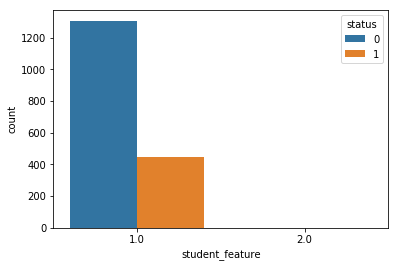

In [31]:
sns.countplot(data = data, x = 'student_feature', hue = 'status')

'student_feature'的取值为2的只有2个，观察一下这两个样本的标签

In [32]:
data[data['student_feature']==2.0]['status']

2989    0
2991    1
Name: status, dtype: int64

'student_feature'的取值为2的样本标签一个是1，一个是0，再结合计数直方图可以看出没有什么相关性。所以直接drop.

In [33]:
del(data['student_feature'])

其余特征缺失率都比较小，故需要填补。填补需要分两类：数值型和非数值型。故先对特征分类，分别处理后再合并。

### 时间特征处理 - X_date
（此处主要针对**时间特征**, 且此处时间特征仅包含日期特征）
**日期特征处理流程**

> 1）浮点型日期转换成字符串型

> 2）取出日期，构建年份、月份、周几等特征

> 3）进一步（特征构建）：groupby对特征进行统计分析

In [34]:
y = data.status
X = data.drop('status', axis=1)

In [35]:
dateFeatures = ['first_transaction_time', 'latest_query_time', 'loans_latest_time']
X_date = data[dateFeatures]

In [36]:
X_date.head()

,first_transaction_time,latest_query_time,loans_latest_time
0,20130817.0,2018-04-25,2018-04-19
1,20160402.0,2018-05-03,2018-05-05
2,20170617.0,2018-05-05,2018-05-01
3,20130516.0,2018-05-05,2018-05-03
4,20170312.0,2018-04-15,2018-01-07


1）浮点型日期转换成字符串型

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# 首先填充缺失值  转成数值才能填充
X_date['first_transaction_time'].fillna(X_date['first_transaction_time'].median(), inplace = True)
# 转成字符串型日期
X_date['first_transaction_time'] = X_date['first_transaction_time'].apply(lambda x:str(x)[:4] + '-' + str(x)[4:6] + '-' + str(x)[6:8])

2） 特征衍生：年份、月份、星期几

In [41]:
X_date['first_transaction_time_year'] = pd.to_datetime(X_date['first_transaction_time']).dt.year
X_date['first_transaction_time_month'] = pd.to_datetime(X_date['first_transaction_time']).dt.month
X_date['first_transaction_time_weekday'] = pd.to_datetime(X_date['first_transaction_time']).dt.weekday

X_date['latest_query_time_year'] = pd.to_datetime(X_date['latest_query_time']).dt.year
X_date['latest_query_time_month'] = pd.to_datetime(X_date['latest_query_time']).dt.month
X_date['latest_query_time_weekday'] = pd.to_datetime(X_date['latest_query_time']).dt.weekday

X_date['loans_latest_time_year'] = pd.to_datetime(X_date['loans_latest_time']).dt.year
X_date['loans_latest_time_month'] = pd.to_datetime(X_date['loans_latest_time']).dt.month
X_date['loans_latest_time_weekday'] = pd.to_datetime(X_date['loans_latest_time']).dt.weekday

In [42]:
# 填充缺失值
X_date['latest_query_time_year'].fillna(X_date['latest_query_time_year'].median(), inplace = True)
X_date['latest_query_time_month'].fillna(X_date['latest_query_time_month'].median(), inplace = True)
X_date['latest_query_time_weekday'].fillna(X_date['latest_query_time_weekday'].median(), inplace = True)

X_date['loans_latest_time_year'].fillna(X_date['loans_latest_time_year'].median(), inplace = True)
X_date['loans_latest_time_month'].fillna(X_date['loans_latest_time_month'].median(), inplace = True)
X_date['loans_latest_time_weekday'].fillna(X_date['loans_latest_time_weekday'].median(), inplace = True)

In [43]:
#删除原来的dateFeatures
X_date.drop(dateFeatures, axis = 1, inplace=True)

###  类别特征 X_cate处理

> 1）筛选类别型特征

> 2）缺失值填充

> 3）类别特征Label与One-Hot编码

**类别特征缺失值填充常用方法**：分箱处理（单独填充为一个类别）、众数填充

观察取值和属性名称，挑选类别特征（去重后<15的认为是类别变量）

In [44]:
for col in X:
    cnt = len(X[col].unique())
    if cnt < 15:
        print(col, cnt, X[col].unique())

regional_mobility 6 [ 3.  4.  1.  2.  5. nan]
is_high_user 2 [0 1]
avg_consume_less_12_valid_month 13 [ 7.  5.  6.  8.  9.  3.  4. 11. 10.  0.  2.  1. nan]
top_trans_count_last_1_month 9 [0.15 0.05 0.65 1.   0.1  0.3  0.4  0.2   nan]
reg_preference_for_trad 6 [ 5.  3.  2.  4.  1. nan]
railway_consume_count_last_12_month 7 [ 0.  1.  2.  4. nan  3. 30.]
jewelry_consume_count_last_6_month 8 [ 0.  1. nan  2.  6.  3.  4.  5.]


将这7个类别特征筛选出来集中处理

In [46]:
categoryFeatures = ['regional_mobility', 'is_high_user', 'avg_consume_less_12_valid_month', 'reg_preference_for_trad']
X_cate = X[categoryFeatures]

In [47]:
X_cate.describe().T\
    .assign(missing_pct=data.apply(lambda x : (len(x)-x.count())/len(x)))  #.assign()添加了缺失率属性

,count,mean,std,min,25%,50%,75%,max,missing_pct
regional_mobility,4752.0,2.678662,0.890360,1.0,2.0,3.0,3.0,5.0,0.000421
is_high_user,4754.0,0.011149,0.105007,0.0,0.0,0.0,0.0,1.0,0.000000
avg_consume_less_12_valid_month,4752.0,6.572601,1.390723,0.0,6.0,7.0,7.0,11.0,0.000421
reg_preference_for_trad,4752.0,4.426557,0.944511,1.0,3.0,5.0,5.0,5.0,0.000421


特征缺失值都比较少，考虑用众数填充

In [49]:
#用众数填充类别的缺失值
for col in X_cate.columns:
    summ = X_cate[col].isnull().sum()
    if summ:
        X_cate[col].fillna(X_cate[col].mode()[0], inplace = True)

In [51]:
X_cate.isnull().any().sum() #统计存在缺失值的列的个数

0

所有类别特征的缺失值已经补全

### 数值型特征-X_num处理

先筛选出X_num

In [52]:
X_num = X.select_dtypes(exclude=['O']).copy()    # 不是复制视图, 所以加copy()
X_num.shape

(4754, 80)

但是，时间类型和类别特征中也有数值型的，所以先筛掉

In [53]:
for col in X_num.columns:
    if col in dateFeatures + categoryFeatures:
        print(col)
        X_num.drop(col, axis = 1, inplace = True)
X_num.shape

regional_mobility
is_high_user
first_transaction_time
avg_consume_less_12_valid_month
reg_preference_for_trad


(4754, 75)

In [56]:
(X_num.describe().T
 .drop(['25%','50%','75%'],axis=1)  #缺失情况描述，去掉25%，50%，75%的情况
 .assign(missing_pct=data.apply(lambda x: (len(x)-x.count())/len(x)))).T

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,4752.000000,4.754000e+03,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,21.751263,1.870201e+04,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,16.474916,5.221783e+04,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,4.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
max,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,234.000000,2.459390e+06,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000
missing_pct,0.000421,0.000421,0.000000,0.000631,0.000421,0.000421,0.000421,0.001683,0.000421,0.000000e+00,...,0.062474,0.062474,0.062474,0.062474,0.062474,0.062474,0.062474,0.062474,0.063946,0.062474


1）缺失值处理

主要填充方法采用众数、中位数和模型填充等，**平均数一般不用的(均值受极端值影响太大)**。

In [57]:
# 统计各列缺失值的比例
col_missing = {}
for col in X_num.columns:
    summ = X_num[col].isnull().sum()
    if summ:
        col_missing[col] = float('%.4f'%(summ*100/len(data)))
    
col_missing = sorted(col_missing.items(), key = lambda d:-d[1])
for col, rate in col_missing[:10]:
    print(rate, '%', col)

8.9609 % cross_consume_count_last_1_month
6.3946 % apply_score
6.3946 % apply_credibility
6.3946 % query_org_count
6.3946 % query_finance_count
6.3946 % query_cash_count
6.3946 % query_sum_count
6.3946 % latest_one_month_apply
6.3946 % latest_three_month_apply
6.3946 % latest_six_month_apply


缺失特征用**中位数**填充。

In [58]:
for col in X_num.columns:
    summ = X_num[col].isnull().sum()
    if summ:
        X_num[col].fillna(X_num[col].median(), inplace = True)

In [59]:
X_num.isnull().any().sum()

0

至此，缺失值已经处理完毕。

### 特征拼接与存储

In [60]:
X = pd.concat([X_cate, X_date, X_num], axis=1)

In [61]:
X.shape

(4754, 88)

In [62]:
import pickle
with open('new_feature.pkl', 'wb') as f:
    pickle.dump(X, f)

### 模型尝试-LR

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2018)

数据不做归一化

In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[准确率] 训练集： 0.7812 测试集： 0.7659
[精准率] 训练集： 0.6677 测试集： 0.7849
[召回率] 训练集： 0.2530 测试集： 0.2284
[f1-score] 训练集： 0.3670 测试集： 0.3293
[auc值] 训练集： 0.7702 测试集： 0.7336


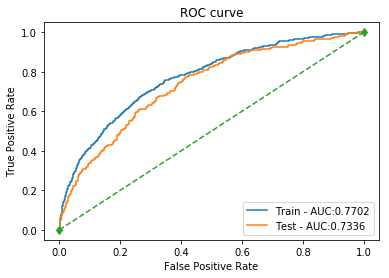

In [65]:
from model_metrics import model_metrics
model_metrics(lr, X_train, X_test, y_train, y_test)

特征标准化再训练

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2018)

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[准确率] 训练集： 0.8040 测试集： 0.7849
[精准率] 训练集： 0.7059 测试集： 0.8037
[召回率] 训练集： 0.3741 测试集： 0.3148
[f1-score] 训练集： 0.4890 测试集： 0.4240
[auc值] 训练集： 0.8196 测试集： 0.7652


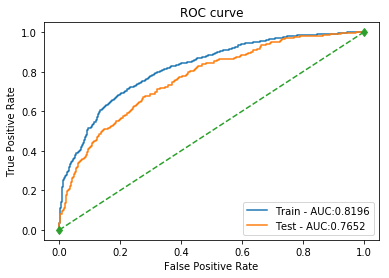

In [72]:
from model_metrics import model_metrics
model_metrics(lr, X_train, X_test, y_train, y_test)

归一化之后，效果确实有显著提升。

# 特征工程
- why:是一个重要的数据预处理的过程。避免维数灾难，降低学习难度。

**选择方式**
1）特征选择与学习器训练相分离：
- 过滤式：filter（依据：特征与标签的相关性，自身发散性，彼此间的相关性）特征过滤好了再训练。如方差筛选、相关系数、卡方检验、互信息/Gain、IV。
- 包裹式：wrapper 训练效果作为特征选择主要依据。SVM-RFE算法。
2）特征选择与学习器训练在一起：
- 嵌入式：embedded l1正则化

本项目采用IV值过滤，再结合RF筛选。  
筛选出IV值高于0.01的特征集合A,随机森林筛选出重要性前20的集合B.求A并B。

先从保存好的new_feature.pkl中获取X

In [75]:
import pickle
with open('new_feature.pkl','rb') as f:
    X = pickle.load(f, encoding = 'gbk')
y = data.status

In [76]:

# 计算 IV 函数
def cal_iv(x, y, n_bins=6, null_value=np.nan,):
    # 剔除空值
    x = x[x != null_value]
    
    # 若 x 只有一个值，返回 0
    if len(x.unique()) == 1 or len(x) != len(y):
        return 0
    
    if x.dtype == np.number:
        # 数值型变量
        if x.nunique() > n_bins:
            # 若 nunique 大于箱数，进行分箱
            x = pd.qcut(x, q=n_bins, duplicates='drop')
                
    # 计算IV
    groups = x.groupby([x, list(y)]).size().unstack().fillna(0)
    t0, t1 = y.value_counts().index
    groups = groups / groups.sum()
    not_zero_index = (groups[t0] > 0) & (groups[t1] > 0)
    groups['iv_i'] = (groups[t0] - groups[t1]) * np.log(groups[t0] / groups[t1])
    iv = sum(groups['iv_i'])
 
    return iv

In [78]:
# 统计每个特征对应的 iv 值
fea_iv = X.apply(lambda x: cal_iv(x, y), axis=0).sort_values(ascending=False) 
#pd.apply()实现对于X的每一列计算其与标签列的iv值，然后合并成一个series,返回。
 
# 筛选 IV > 0.05 的特征
imp_fea_iv = fea_iv[fea_iv > 0.05].index
imp_fea_iv

Index(['railway_consume_count_last_12_month',
       'trans_fail_top_count_enum_last_1_month', 'history_fail_fee',
       'loans_score', 'apply_score', 'loans_overdue_count',
       'trans_fail_top_count_enum_last_12_month',
       'trans_fail_top_count_enum_last_6_month', 'latest_one_month_fail',
       'rank_trad_1_month', 'max_cumulative_consume_later_1_month',
       'latest_one_month_suc', 'trans_day_last_12_month',
       'top_trans_count_last_1_month', 'consfin_avg_limit',
       'pawns_auctions_trusts_consume_last_1_month'],
      dtype='object')

In [79]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier()
rf.fit(X, y)
 
rf_impc = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
 
# 筛选 重要性前二十 个特征
imp_fea_rf = rf_impc.index[:20]

In [80]:
imp_fea_rf

Index(['trans_fail_top_count_enum_last_1_month', 'loans_score',
       'history_fail_fee', 'apply_score', 'latest_one_month_fail',
       'trans_amount_3_month', 'max_cumulative_consume_later_1_month', 'abs',
       'loans_overdue_count', 'repayment_capability',
       'historical_trans_amount', 'consume_top_time_last_1_month',
       'latest_query_day', 'first_transaction_day', 'historical_trans_day',
       'number_of_trans_from_2011', 'trans_amount_increase_rate_lately',
       'loans_count', 'loans_latest_day', 'history_suc_fee'],
      dtype='object')

合并取并集

In [82]:
# 合并特征并筛选出有用特征
imp_fea = list(set(imp_fea_iv) | set(imp_fea_rf))
X_imp = X[imp_fea]

In [87]:
X_imp.shape

(4754, 29)

训练看看效果

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imp = scaler.fit_transform(X_imp)

X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=0.3, random_state=2018)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

[准确率] 训练集： 0.8010 测试集： 0.7870
[精准率] 训练集： 0.7038 测试集： 0.8037
[召回率] 训练集： 0.3561 测试集： 0.3120
[f1-score] 训练集： 0.4729 测试集： 0.4242
[auc值] 训练集： 0.8052 测试集： 0.7810


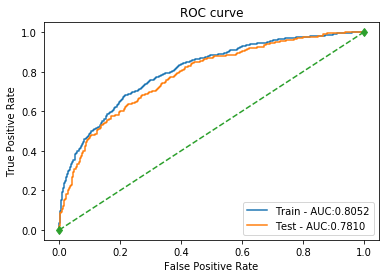

In [86]:
from model_metrics import model_metrics
model_metrics(lr, X_train, X_test, y_train, y_test)

后补：忘了考虑类别不均衡的问题，下利用'class_weight'尝试

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imp = scaler.fit_transform(X_imp)

X_train, X_test, y_train, y_test = train_test_split(X_imp,y,test_size=0.3, random_state=2018)

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

[准确率] 训练集： 0.7535 测试集： 0.7218
[精准率] 训练集： 0.5062 测试集： 0.8619
[召回率] 训练集： 0.6835 测试集： 0.6435
[f1-score] 训练集： 0.5816 测试集： 0.5378
[auc值] 训练集： 0.8078 测试集： 0.7803


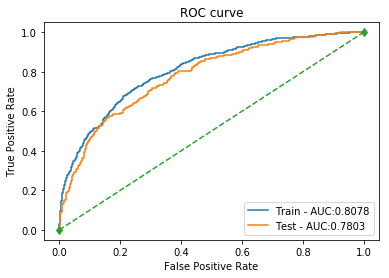

In [90]:
from model_metrics import model_metrics
model_metrics(lr, X_train, X_test, y_train, y_test)

不知为何，效果不如不用，故暂放。

auc: 0.7652 ->0.7810  
accuracy:0.7849 ->0.7870  
特征选择后，有了一定程度的优化。故保存之。

### 保存选择后的29个特征

In [88]:
import pickle
with open('29_features.pkl','wb') as f:
    pickle.dump(X_imp,f)

In [92]:
y.shape

(4754,)

In [93]:
with open('new_label.pkl','wb') as f:
    pickle.dump(y,f)